## Loading the Dataset

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
demo = pd.read_csv("column_2C_weka-1.csv")
demo.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


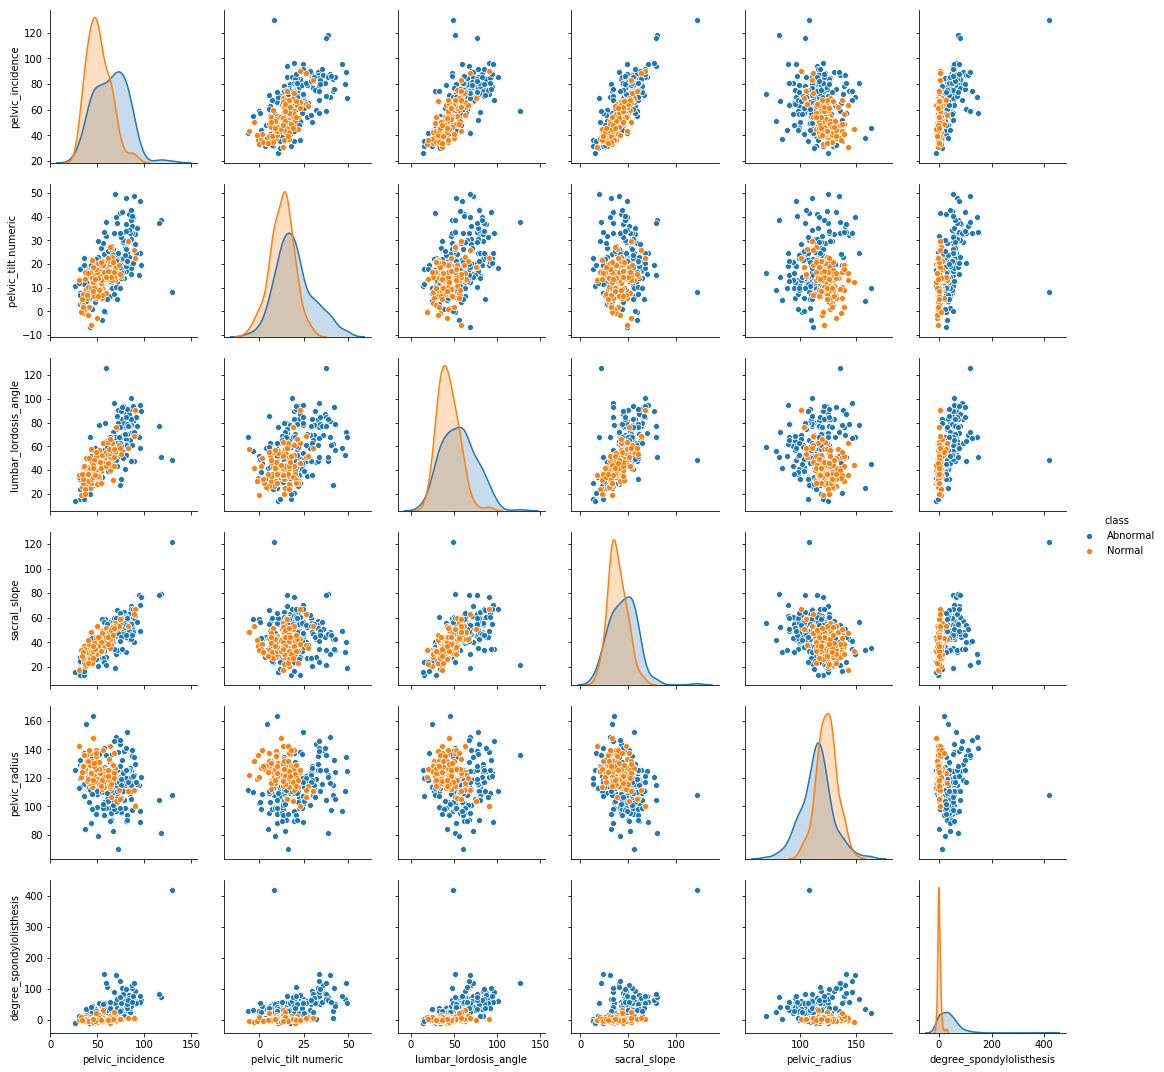

In [35]:
sns.pairplot(demo,diag_kind='kde',hue='class')

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
demo = pd.read_csv("column_2C_weka-1.csv")
demo = demo.drop('class',axis=1)
feature_names = demo.columns
demo = pd.DataFrame(sc.fit_transform(demo))
demo.columns= feature_names
demo.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


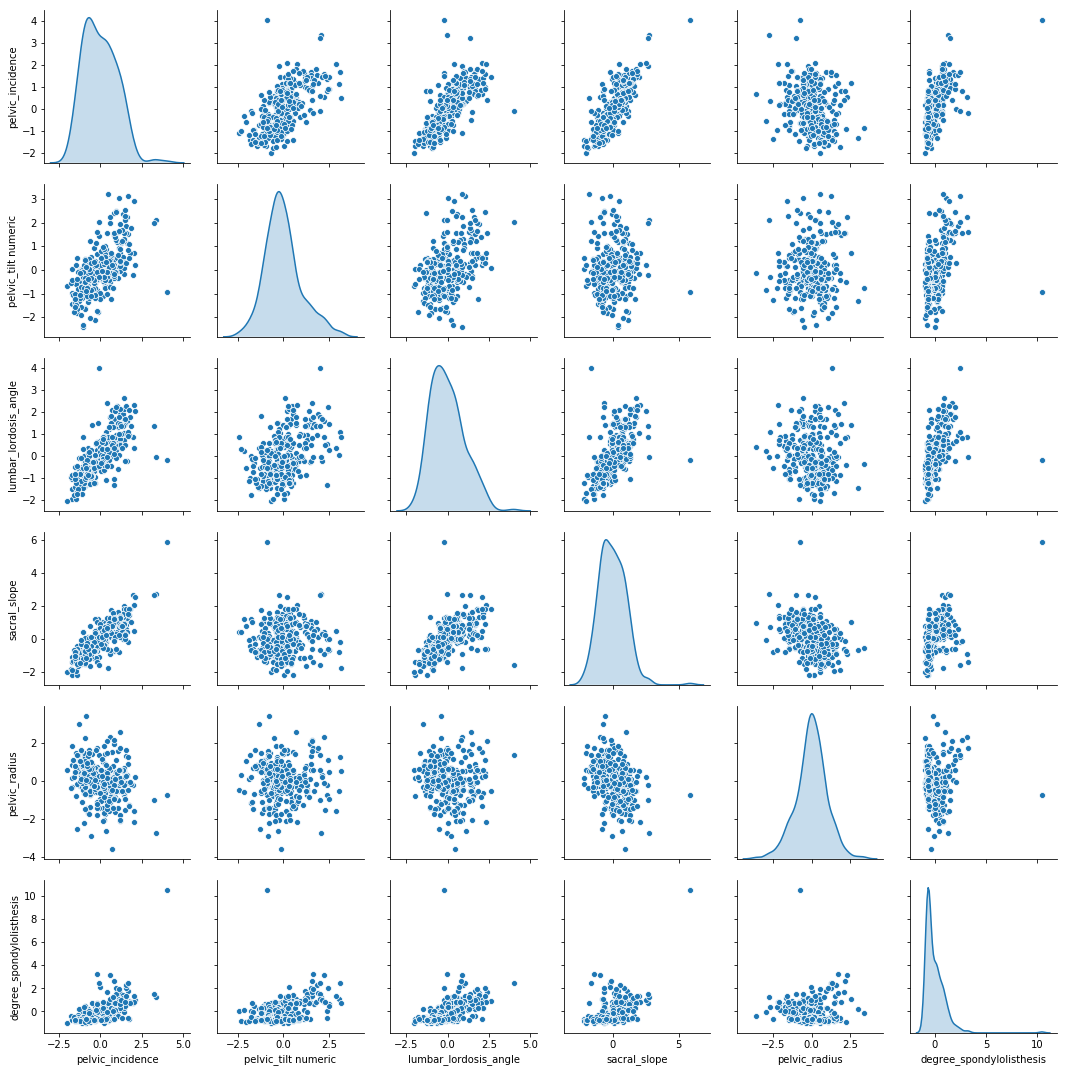

In [37]:
sns.pairplot(demo,diag_kind='kde')

In [38]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(demo)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,1860.000000
1,2,1151.890555
2,3,929.762786
3,4,807.031794
4,5,706.509261
5,6,630.439728
6,7,576.024481
7,8,541.385279
8,9,509.667256
9,10,475.166767


In [39]:
errors = clusters_df.cluster_errors

In [40]:
for i in range(8):
    print(errors[i+1]-errors[i])

-708.109444949928
-222.12776926664515
-122.73099138224006
-100.52253308070158
-76.06953363989896
-54.41524647575068
-34.639201794317955
-31.718023002413474


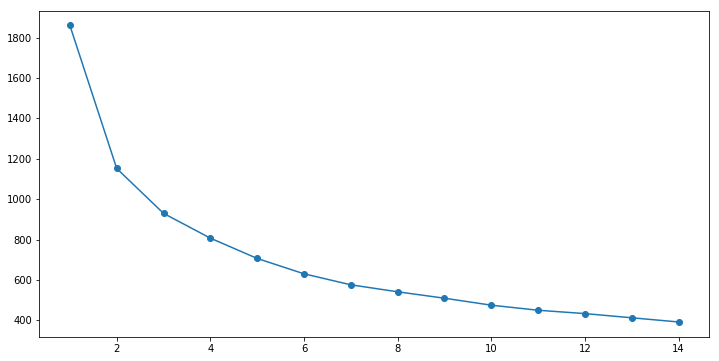

In [41]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3629017847276513


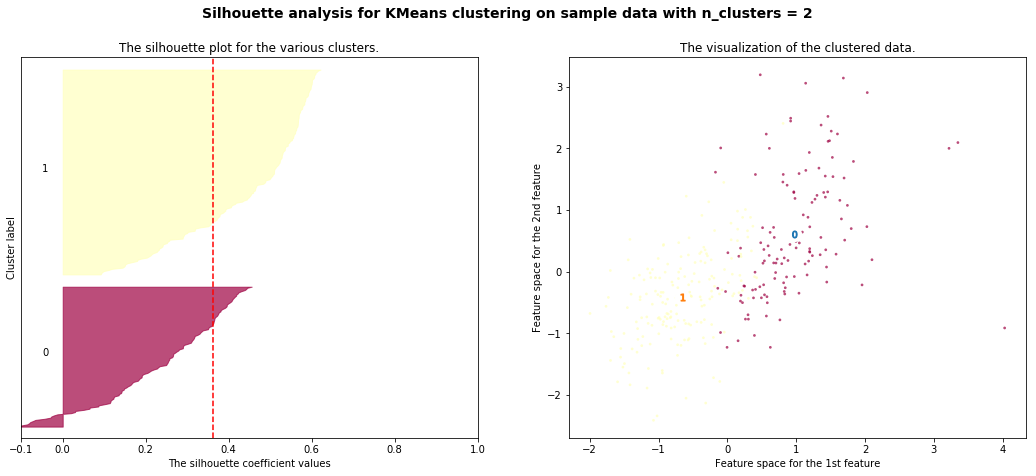

For n_clusters = 3 The average silhouette_score is : 0.2976923764726637


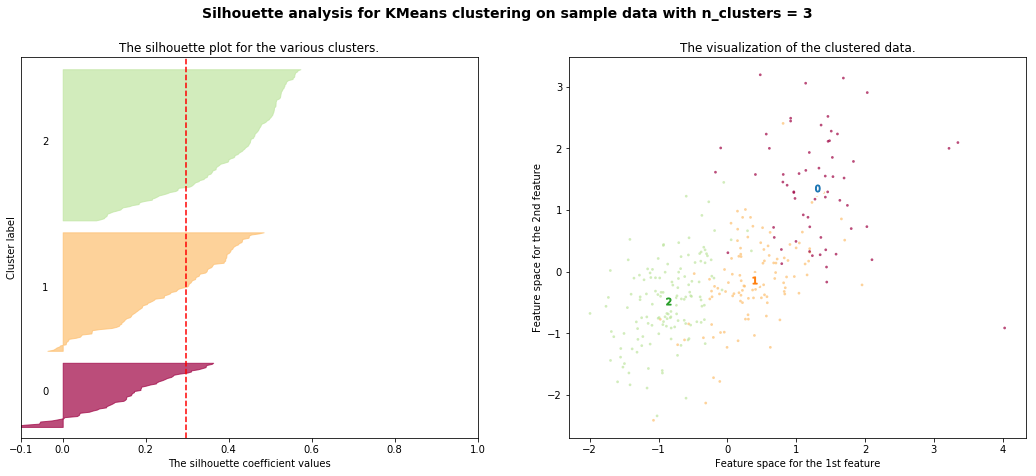

For n_clusters = 4 The average silhouette_score is : 0.2678115253740371


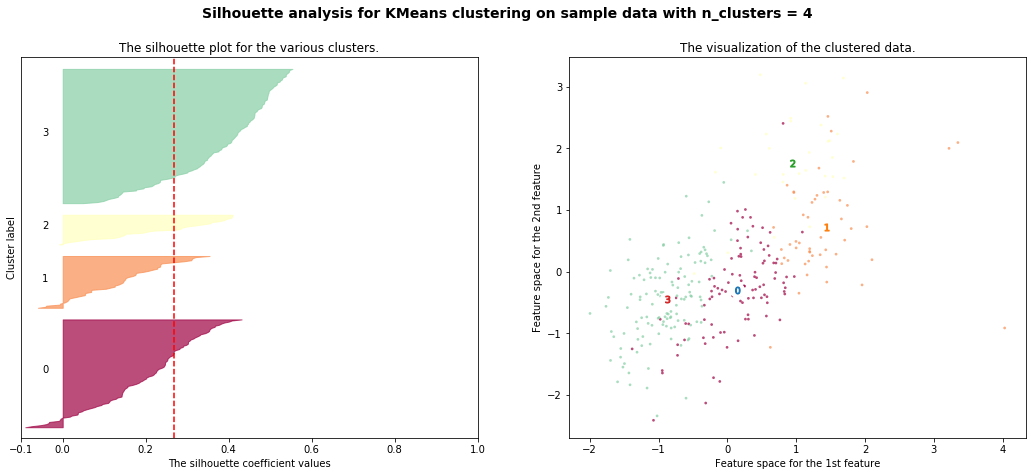

For n_clusters = 5 The average silhouette_score is : 0.2317656040737327


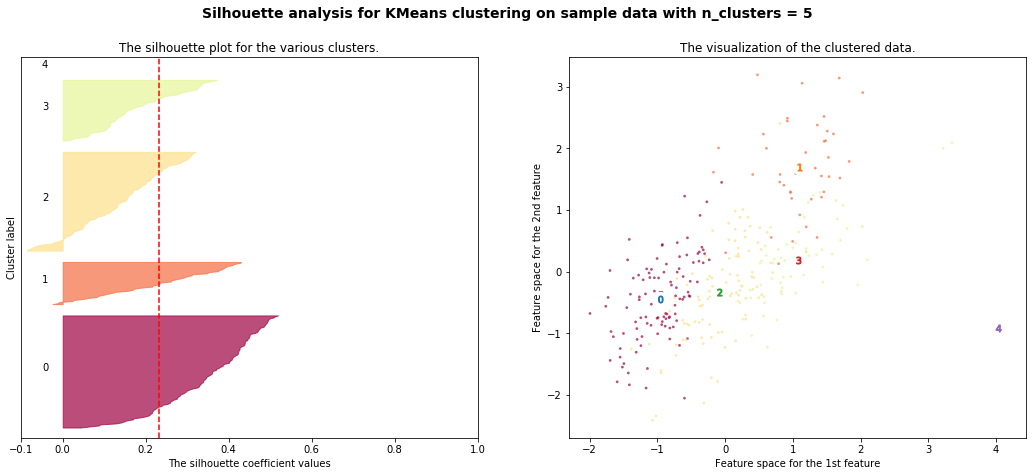

For n_clusters = 6 The average silhouette_score is : 0.2448928846466865


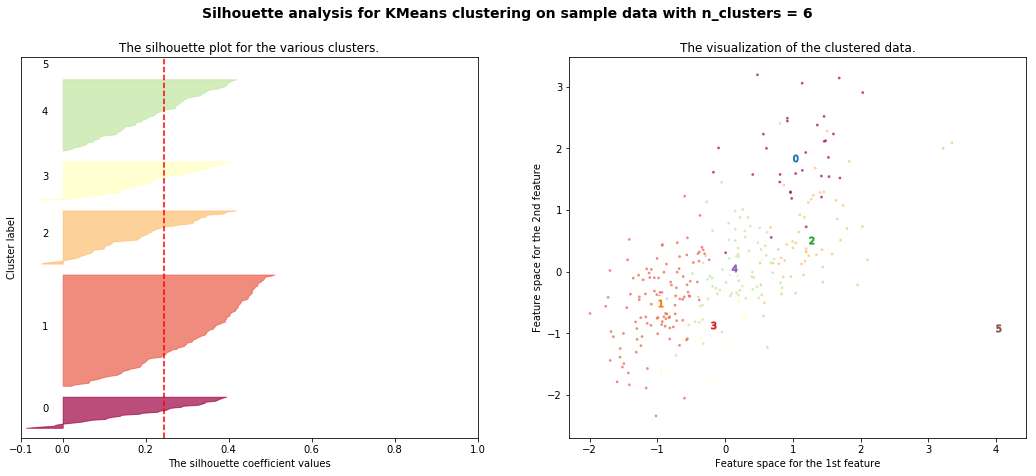

In [42]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = demo.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [43]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans = kmeans.fit(demo)
labels = kmeans.predict(demo)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.97012789  0.60978183  0.88852948  0.79107877 -0.27088427  0.73078155]
 [-0.66432671 -0.41756799 -0.60844953 -0.54171698  0.18549684 -0.5004265 ]]


In [44]:
demo['group'] = labels

In [45]:
demo.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,group
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,1
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


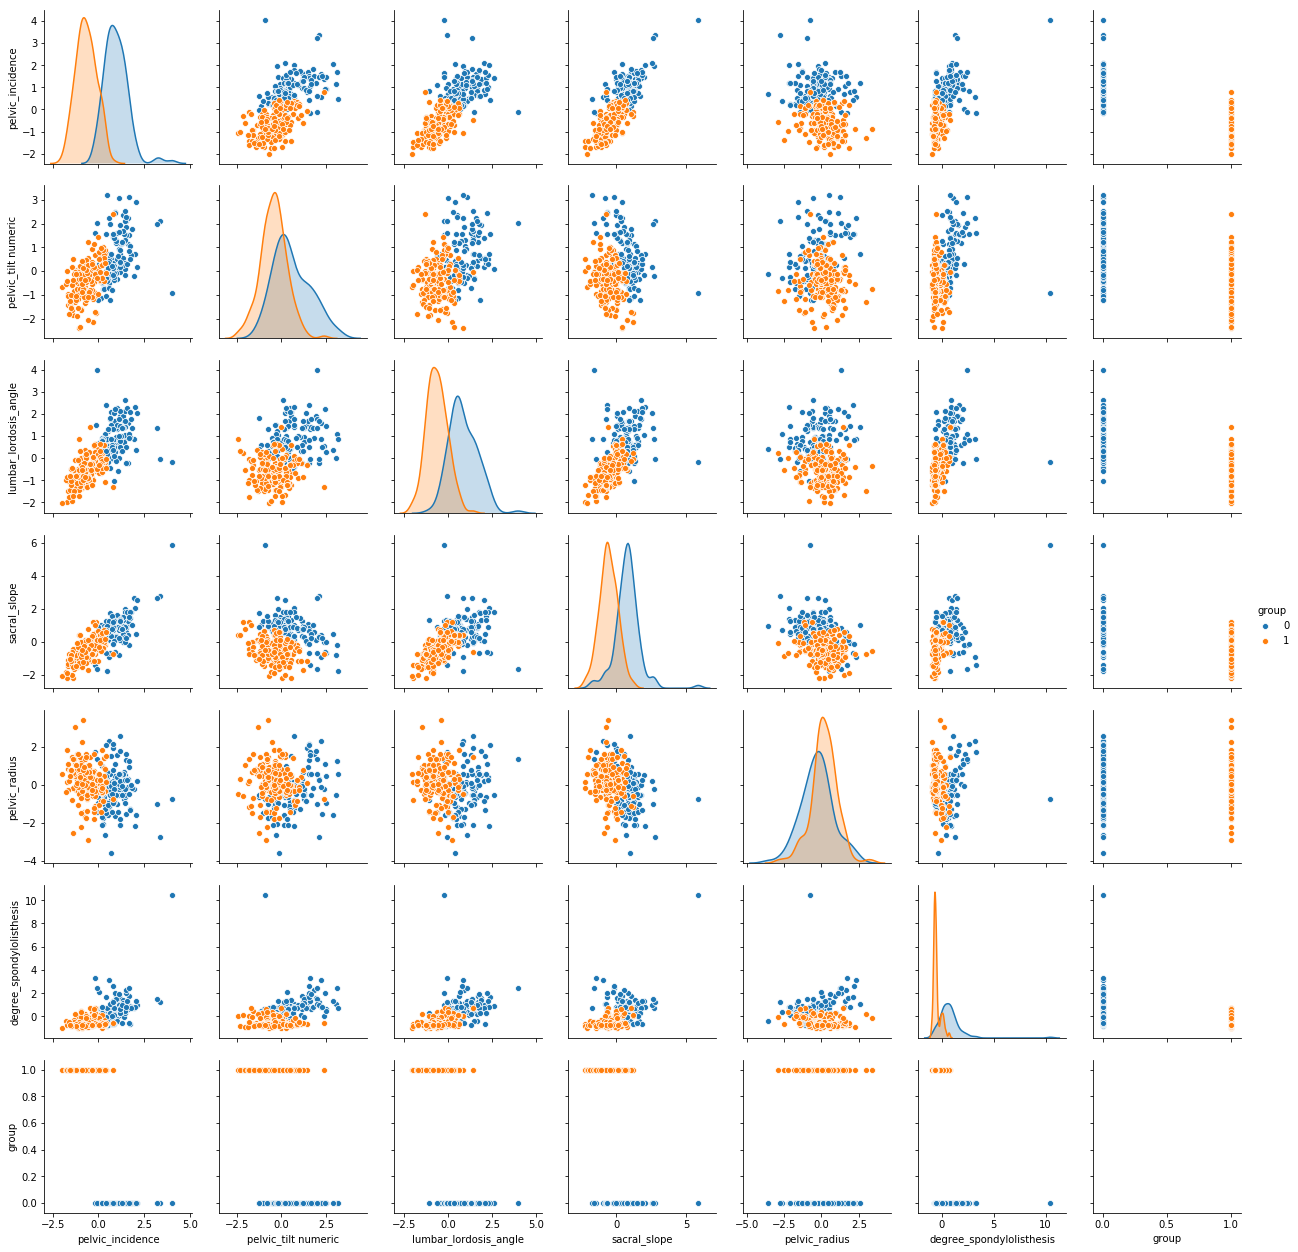

In [46]:
sns.pairplot(demo,diag_kind='kde',hue='group')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284BC9516A0>,
      dtype=object)

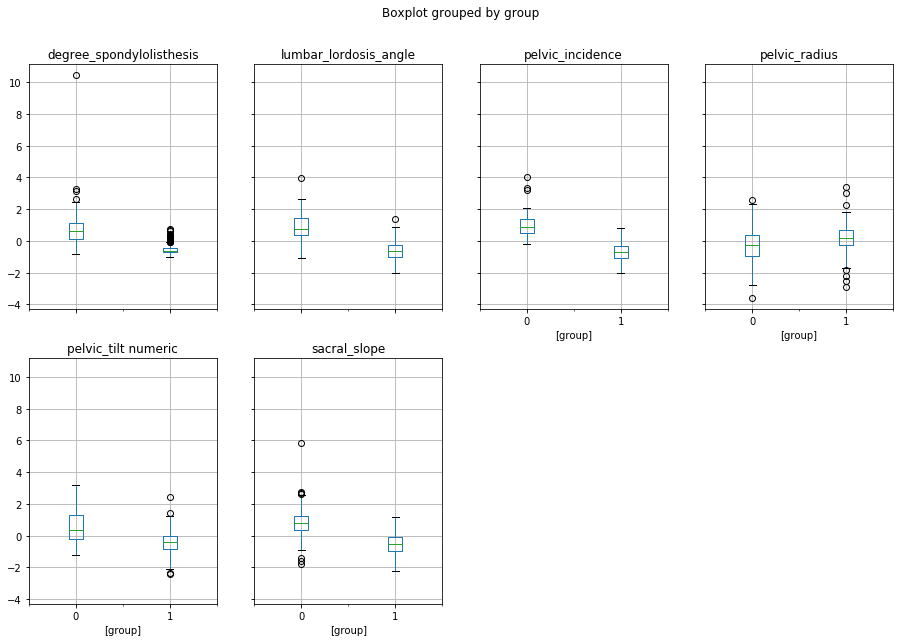

In [47]:
demo.boxplot(by = 'group',  layout=(2,4), figsize=(15, 10))

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
demo = pd.read_csv("column_2C_weka-1.csv")
demo = demo.drop('class',axis=1)
feature_names = demo.columns
demo = pd.DataFrame(sc.fit_transform(demo))
demo.columns= feature_names
demo.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [49]:
from sklearn.cluster import AgglomerativeClustering 

In [50]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [51]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

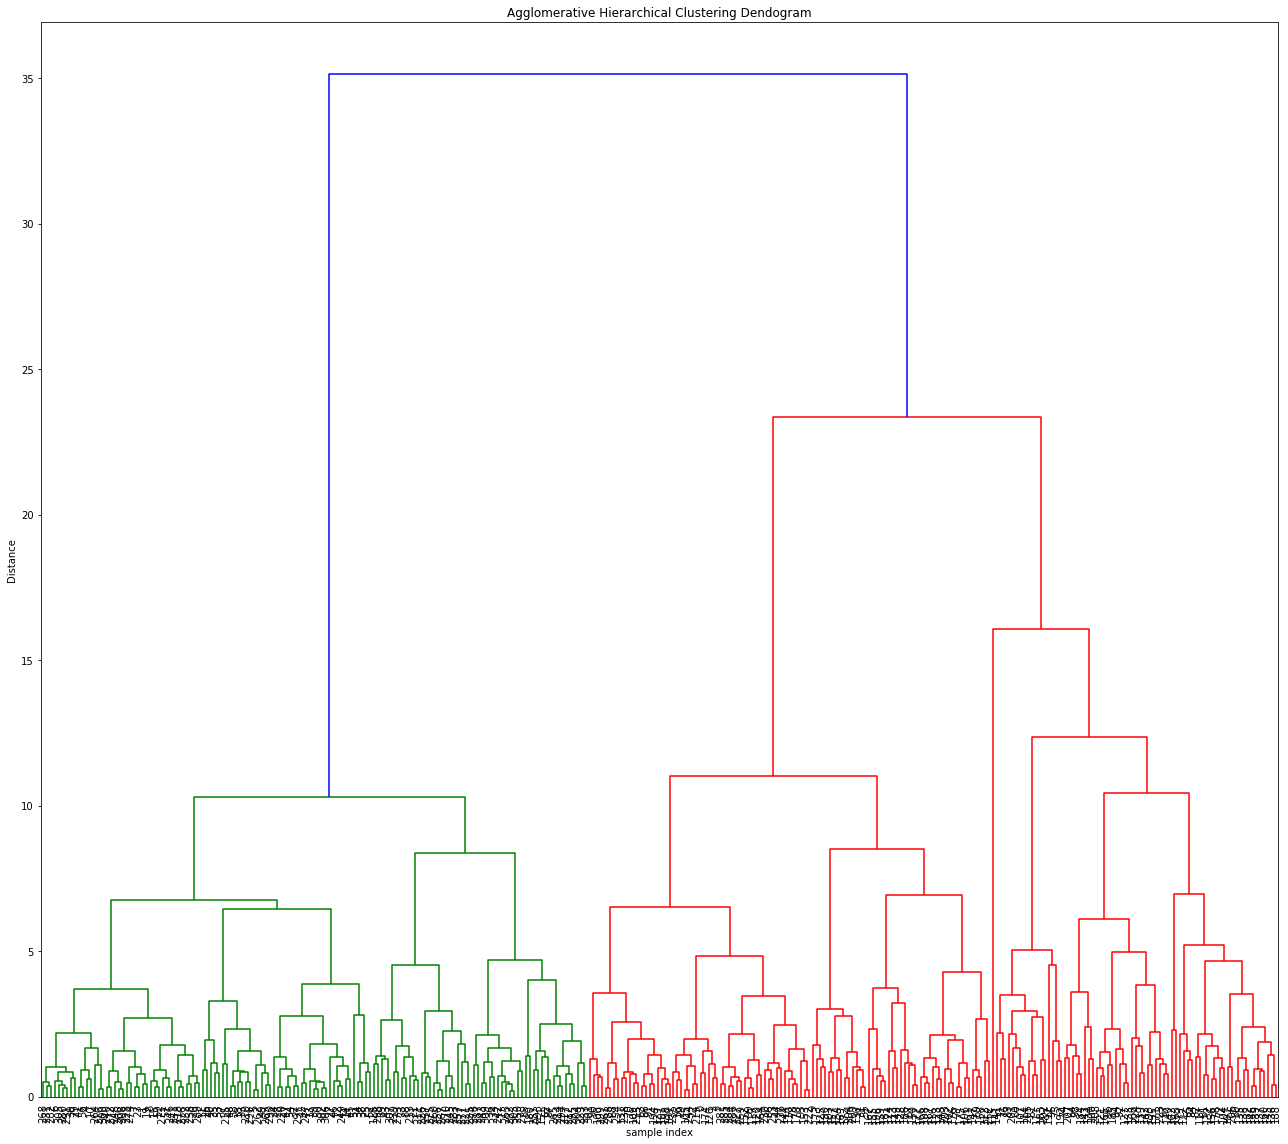

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(demo, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=25,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [53]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [54]:
model.fit(demo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [55]:
demo['labels'] = model.labels_
demo.groupby(["labels"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
labels,,,,,,
0,173,173,173,173,173,173
1,137,137,137,137,137,137


In [56]:
demo.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1
